In [66]:
import pandas as pd

# 1 Dataset Overview

In [67]:
# read csv file
df_netflix = pd.read_csv(r'D:\Data Science\Data Cleaning of Netflix Project\netflix_titles.csv')
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [68]:
#data types
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [69]:
# shape
df_netflix.shape

(8807, 12)

# 2 Identifying Missing Data

In [70]:
# number of rows missing in each column
df_netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [71]:
# % of rows missing in each column

for col in df_netflix.columns:
    per = df_netflix[col].isnull().mean()
    print(col,':',round(per*100, 2),'%')
  

show_id : 0.0 %
type : 0.0 %
title : 0.0 %
director : 29.91 %
cast : 9.37 %
country : 9.44 %
date_added : 0.11 %
release_year : 0.0 %
rating : 0.05 %
duration : 0.03 %
listed_in : 0.0 %
description : 0.0 %


# Dealing with missing data

In [72]:
# Remove a col or row with drop,dropna,isnull
# drop col
df_netflix.drop('director',axis=1)
# drop row
no_director = df_netflix[df_netflix['director'].isnull()].index
# drop row
df_netflix.drop(no_director,axis=0)
# ~ + .isnull()
df_netflix[~df_netflix['director'].isnull()]
#dropna
df_netflix.dropna(subset=['director'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [73]:
# Use fillna() to reaplace nan with the mean,median or mode
# replace categorical data with mode
''.join(df_netflix['rating'].mode())
df_netflix['rating'] = df_netflix['rating'].fillna(''.join(df_netflix['rating'].mode()))

In [74]:
df_netflix['duration'] =df_netflix['duration'].fillna('0')

# 4 idetifying Outliers

In [75]:
# Extractiong data from "duration column with split and extract() methods"
df_movie = df_netflix[df_netflix['type'] == 'Movie']
df_movie['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [77]:
df_movie['minute'] = df_movie['duration'].str.split(expand=True)[0].astype(int)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13844\38073104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['minute'] = df_movie['duration'].str.split(expand=True)[0].astype(int)


In [78]:
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


In [80]:
# extraction
df_movie['date_added'].str.extract(r'(\d{4})')

,0
0,2021
6,2021
7,2021
9,2021
12,2021
...,...
8801,2016
8802,2019
8804,2019
8805,2020


### Identyfying outliers

Using histogram

<Axes: ylabel='Frequency'>

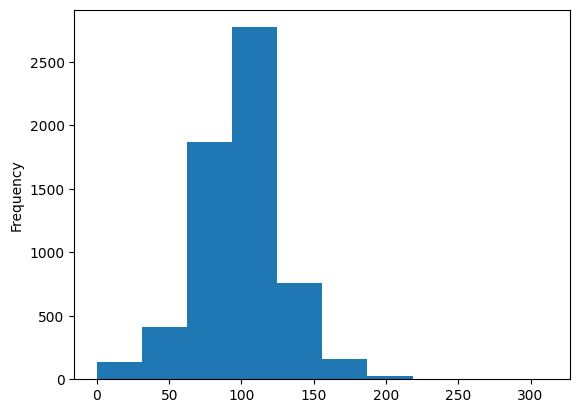

In [81]:
df_movie['minute'].plot(kind='hist',bins=10)

In [82]:
# get bar ranges with value_counts
df_movie['minute'].value_counts(bins=10).sort_index()

(-0.313, 31.2]     135
(31.2, 62.4]       410
(62.4, 93.6]      1867
(93.6, 124.8]     2772
(124.8, 156.0]     766
(156.0, 187.2]     150
(187.2, 218.4]      22
(218.4, 249.6]       6
(249.6, 280.8]       2
(280.8, 312.0]       1
Name: count, dtype: int64

In [85]:
# dealing with outliers
df_movie[~((df_movie['minute']>31) & (df_movie['minute']<218))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States","September 1, 2021",1984,R,229 min,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,229
694,s695,Movie,Aziza,Soudade Kaadan,"Caress Bashar, Abdel Moneim Amayri","Lebanon, Syria","June 17, 2021",2019,TV-PG,13 min,"Comedies, Dramas, Independent Movies",This short film follows a newly displaced Syri...,13
695,s696,Movie,Besieged Bread,Soudade Kaadan,"Lama Hakeim, Gabriel Malki, Ehab Shaaban",NaN,"June 17, 2021",2015,TV-14,12 min,"Dramas, International Movies","In battle-ridden Syria, a woman trying to smug...",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,s7789,Movie,Power Rangers: Megaforce: The Robo Knight Befo...,James Barr,"Andrew M. Gray, Ciara Hanna, John Mark Louderm...",United States,"January 1, 2016",2013,TV-Y7,24 min,Children & Family Movies,Robo Knight learns the meaning of Christmas fr...,24
7848,s7849,Movie,Refugee,"Clementine Malpas, Leslie Knott","Cate Blanchett, Lynsey Addario, Omar Victor Di...",NaN,"March 10, 2017",2016,TV-PG,24 min,Documentaries,Five acclaimed photographers travel the world ...,24
7891,s7892,Movie,Room on the Broom,"Max Lang, Jani Lachauer","Simon Pegg, Gillian Anderson, Rob Brydon, Mart...","United Kingdom, Germany","July 1, 2019",2012,TV-Y7,26 min,"Children & Family Movies, Independent Movies",A gentle witch with a ginger braid offers ride...,26
7932,s7933,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",1964,TV-14,228 min,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...,228


Using boxplot to recognize outliers

<Axes: >

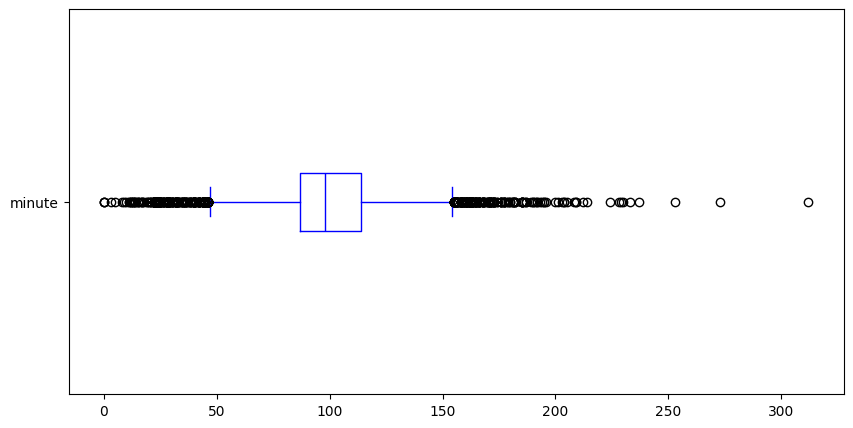

In [87]:
df_movie['minute'].plot(kind='box',vert = False, color = 'blue',figsize=(10,5))

In [ ]:
# overview descriptive statistics
# IQR = Q3-Q1
# Q1-1.5*IQR
# Q3+1.5*IQR

### Using bars to identify outliers within categorical data

<Axes: xlabel='rating'>

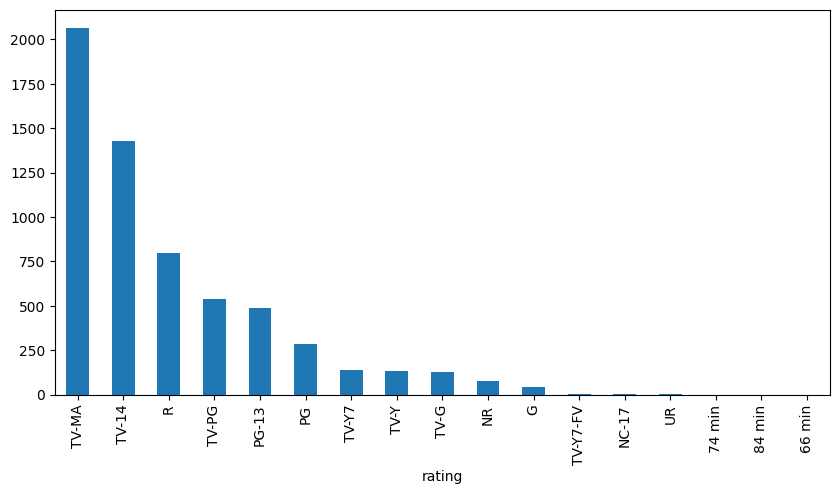

In [89]:
df_movie['rating'].value_counts().plot(kind='bar',figsize=(10,5))

# Text Normalization

Dealing with blank spaces with strip(),istrip(),rstrip()

In [92]:
# how the strip() methos works
movie_title = '  Titanic  '
# trim the leading space with lstrip()
movie_title.lstrip()
movie_title.rstrip()
movie_title.strip()

'Titanic'